In [2]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train = pd.read_pickle("clean-data/train.pkl")
train.head()

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time
0,4211,633,3,Business,9,5,34546,9,5,34810,...,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,432,745,264,2840
1,25375,2285,3,Personal,12,5,40576,12,5,41001,...,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,856,1993,425,1248
2,1899,265,3,Business,30,2,45565,30,2,45764,...,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,155,455,199,619
3,9336,1402,3,Business,15,5,33934,15,5,33965,...,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,855,1341,31,1021
4,27883,1737,1,Personal,13,1,35718,13,1,35778,...,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,770,1214,60,545


In [4]:
train_pca = pd.read_pickle("clean-data/train-pca.pkl")
train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,pickup_to_arrival_time
0,0.471082,0.270344,-0.486887,0.600463,-0.540924,-1.615606,745
1,0.624127,1.498240,-0.350465,-0.674034,0.329674,0.866783,2886
2,0.528462,-0.477729,0.776858,0.343377,0.045975,-0.084287,2615
3,0.635800,0.729681,-2.567904,0.609702,-0.724023,0.841407,2986
4,0.562681,-0.769030,-1.075503,0.506759,-0.834757,-0.026859,1602


In [5]:
# Combining riders and train into one df
riders = pd.read_pickle("clean-data/riders.pkl")
train = train.merge(riders, on="rider_id")

In [6]:
train

,order_id,user_id,platform,personal_or_business,placement_date,placement_weekday,placement_time,confirm_date,confirm_weekday,confirm_time,...,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time,no_of_orders,age,average_rating,no_of_ratings
0,4211,633,3,Business,9,5,34546,9,5,34810,...,-1.300406,36.829741,432,745,264,2840,1637,1309,13.8,549
1,27440,2642,3,Personal,18,5,56477,18,5,56490,...,-1.356237,36.904295,432,2886,13,1927,1637,1309,13.8,549
2,14170,3339,3,Business,31,5,46301,31,5,47569,...,-1.273412,36.818206,432,2615,1268,1219,1637,1309,13.8,549
3,21727,3523,3,Personal,2,2,25930,2,2,25949,...,-1.223520,36.802061,432,2986,19,1577,1637,1309,13.8,549
4,8301,87,2,Personal,22,2,38458,22,2,38544,...,-1.300431,36.752427,432,1602,86,1036,1637,1309,13.8,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21191,27103,3718,3,Business,13,2,40177,13,2,41538,...,-1.265432,36.795034,528,919,1361,1230,5770,1793,14.2,2205
21192,3786,1558,3,Personal,21,4,59597,21,4,60447,...,-1.278067,36.783487,638,2331,850,1406,102,873,13.7,32
21193,7281,2008,3,Business,10,1,61240,10,1,61881,...,-1.285850,36.830629,773,2418,641,3356,5,105,0.0,0
21194,15575,1346,3,Business,29,2,52315,29,2,52363,...,-1.298575,36.808800,860,717,48,940,5,448,15.0,2


In [7]:
# Dropping date/time columns
dropped = ["placement_date", "placement_weekday", "placement_time",
           "confirm_date", "confirm_weekday", "confirm_time",
           "arrival_pickup_date", "arrive_pickup_weekday", "arrive_time",
           "pickup_date", "pickup_weekday", "pickup_time",
           "arrival_dest_date", "arrival_dest_weekday", "arrival_dest_time"]

train.drop(columns=dropped, inplace=True)

In [8]:
train.head()

,order_id,user_id,platform,personal_or_business,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,rider_id,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time,no_of_orders,age,average_rating,no_of_ratings
0,4211,633,3,Business,4,20.4,-1.317755,36.830370,-1.300406,36.829741,432,745,264,2840,1637,1309,13.8,549
1,27440,2642,3,Personal,20,24.5,-1.326774,36.787807,-1.356237,36.904295,432,2886,13,1927,1637,1309,13.8,549
2,14170,3339,3,Business,6,24.7,-1.255189,36.782203,-1.273412,36.818206,432,2615,1268,1219,1637,1309,13.8,549
3,21727,3523,3,Personal,18,15.2,-1.290315,36.757377,-1.223520,36.802061,432,2986,19,1577,1637,1309,13.8,549
4,8301,87,2,Personal,7,19.2,-1.273524,36.799220,-1.300431,36.752427,432,1602,86,1036,1637,1309,13.8,549


In [9]:
def create_dummies(df):
    # Creating dummy variables for platforms 1, 2, 3. They will all be 0 for
    # platform 4.
    for i in range(1, 4):
        plat_str = "platform" + str(i)
        df[plat_str] = 0
        df.loc[df.platform == i, plat_str] = 1
        
    # Creating dummy variable for personal_or_business (1 if personal 0 if business)
    df["personal"] = 0
    df.loc[df.personal_or_business == "Personal", "personal"] = 1

create_dummies(train)

In [10]:
dropped = ["order_id", "user_id", "platform", "personal_or_business", "rider_id"]
train.drop(columns=dropped, inplace=True)
train

,distance,temperature,pickup_lat,pickup_long,dest_lat,dest_long,pickup_to_arrival_time,placement_to_confirm_time,confirm_to_pickup_time,no_of_orders,age,average_rating,no_of_ratings,platform1,platform2,platform3,personal
0,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745,264,2840,1637,1309,13.8,549,0,0,1,0
1,20,24.5,-1.326774,36.787807,-1.356237,36.904295,2886,13,1927,1637,1309,13.8,549,0,0,1,1
2,6,24.7,-1.255189,36.782203,-1.273412,36.818206,2615,1268,1219,1637,1309,13.8,549,0,0,1,0
3,18,15.2,-1.290315,36.757377,-1.223520,36.802061,2986,19,1577,1637,1309,13.8,549,0,0,1,1
4,7,19.2,-1.273524,36.799220,-1.300431,36.752427,1602,86,1036,1637,1309,13.8,549,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21191,3,22.2,-1.265003,36.812624,-1.265432,36.795034,919,1361,1230,5770,1793,14.2,2205,0,0,1,0
21192,6,19.9,-1.269609,36.825741,-1.278067,36.783487,2331,850,1406,102,873,13.7,32,0,0,1,1
21193,7,19.0,-1.250823,36.789526,-1.285850,36.830629,2418,641,3356,5,105,0.0,0,0,0,1,0
21194,2,27.0,-1.291787,36.787267,-1.298575,36.808800,717,48,940,5,448,15.0,2,0,0,1,0


In [11]:
# Creating standard linear model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
X = train.loc[:, train.columns != "pickup_to_arrival_time"]
y = train.pickup_to_arrival_time
linear.fit(X=X, y=y)

LinearRegression()

In [12]:
# Running cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(linear, X=X, y=y, cv=10).mean()

0.34104294576737526

In [13]:
# Trying regression tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X=X, y=y)

DecisionTreeRegressor()

In [15]:
import graphviz
from sklearn.tree import export_graphviz

def draw_regression_tree(tree, feature_names):
    dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         filled=True, 
                         impurity=False,
                         rounded=True,  
                         special_characters=True)  
    
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree',view=True)

In [18]:
path = tree.cost_complexity_pruning_path(X=X, y=y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [33]:
pd.DataFrame({'alpha':ccp_alphas, 'MSE':impurities}).head()

,alpha,MSE
0,0.000000,0.000000
1,0.000018,0.000035
2,0.000024,0.000059
3,0.000024,0.000083
4,0.000024,0.000106


In [54]:
ccp_alphas[19000::20]

array([   548.39577892,    684.37901656,   1037.67700855, 217006.97514148])

In [55]:
from sklearn.model_selection import cross_val_score

for a in ccp_alphas[19000::20]:
    model = DecisionTreeRegressor(ccp_alpha=a)
    cv_score = -cross_val_score(model, X=X, y=y, scoring="neg_mean_squared_error", cv=10).mean()
    print(str(a) + ": " + str(cv_score))

548.3957789183132: 668544.0567568487
684.3790165569771: 649396.2638722878
1037.6770085511087: 638264.0192473948
217006.97514147952: 902443.8595766412


In [56]:
tree_pruned = DecisionTreeRegressor(ccp_alpha=1037.677)
tree_pruned.fit(X=X, y=y)

DecisionTreeRegressor(ccp_alpha=1037.677)

In [57]:
print('The unpruned tree had', tree.get_n_leaves(), 'leaves.')
print('The pruned tree has', tree_pruned.get_n_leaves(), 'leaves.')

The unpruned tree had 21070 leaves.
The pruned tree has 24 leaves.


In [58]:
draw_regression_tree(tree_pruned, X.columns)

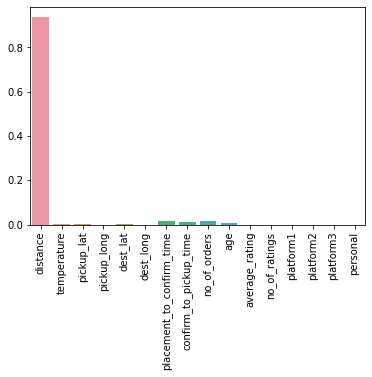

In [62]:
p = sns.barplot(x=X.columns, y=tree_pruned.feature_importances_)
p = p.set_xticklabels(labels=X.columns, rotation=90)